[Smartknower August Minor Project](https://github.com/soumesh2002/Smartknower-August-Project)

### Importing the required models for the classifier

In [1]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# optimized imports
from numpy import concatenate as npcon
from pandas import read_csv # for reading data
from matplotlib import pyplot as plt

## Reading the data

In [2]:
data_ds = read_csv('./voice.csv')
# read_excel() needs an additional dependancies 'openpyxl'

## Remove/Handle null values (if any)

In [3]:
data_ds.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [4]:
# we have to classify this machine learning model on the basis of 'label' (male or female)
# let us change the values to 1 and 0 in 'label' to carry out further operations.

# we can use replace()
data_ds = data_ds.replace(to_replace="male", value=1)
data_ds = data_ds.replace(to_replace="female", value=0)

## Percentage Distribution Chart using Pie-Chart
![](I01.png)
<br> after replacement of male -> 1 and female -> 0 <br>
![](I02.png)

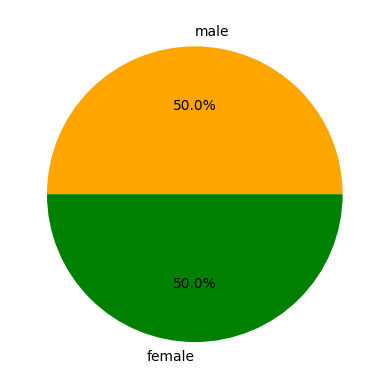

In [5]:
count = data_ds.pivot_table(columns=['label'], aggfunc='size')
gender = [count[0], count[1]]
piechart_label = ["male", "female"]
colors = ['ORANGE', 'GREEN']
plt.pie(gender, labels=piechart_label, autopct='%1.1f%%', colors=colors)
plt.show()

## Spliting the dataset into training and test state, in a 80:20 ratio

In [6]:
# In pandas, iloc(integer based indexing) used for selecting specific rows in a DataFrame
X = data_ds.iloc[:, :-1].values # independent feature
y = data_ds.iloc[:, -1].values # dependent feature -> label
# print(X)
# print(y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
print(X_test)

[[0.19528383 0.03766286 0.19572816 ... 7.4296875  7.2890625  0.09409376]
 [0.17948993 0.06042679 0.1815235  ... 4.546875   4.5234375  0.11371693]
 [0.22159779 0.02752513 0.22067797 ... 4.125      3.9140625  0.10689732]
 ...
 [0.15757874 0.07969795 0.14780059 ... 4.9609375  4.953125   0.10949001]
 [0.20704995 0.03953664 0.20566372 ... 8.71875    8.6953125  0.08035259]
 [0.16115553 0.05365452 0.16872908 ... 0.22949219 0.06347656 0.16239316]]


In [9]:
# Standardization of a dataset is a common requirement for many machine learning estimators
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Logistic Regression - This is used when the dependant variable (here: y) is categorical (e.g. label)
Whether the person is male(1) or female(0) <br>

In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [11]:
classifier.predict(sc.transform(X_train))

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [12]:
y_pred = classifier.predict(X_test)
(npcon((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

array([[0, 0],
       [1, 1],
       [0, 0],
       ...,
       [1, 1],
       [0, 0],
       [0, 0]], dtype=int64)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm) # confustion matrix
log_classifier_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))


[[289  12]
 [  5 328]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       301
           1       0.96      0.98      0.97       333

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



##### Decision Tree Classifier ➡️ <br> Belongs to Supervised Machine Learning, which means they use prelabelled data in order to train an algorithm that can be used to make a prediction

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# entropy means the randomness or measuring the disorder of the information being proccesed (dataset)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
classifier.predict(sc.transform(X_train))

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [16]:
y_pred = classifier.predict(X_test)
npcon((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

array([[0, 0],
       [1, 1],
       [0, 0],
       ...,
       [1, 1],
       [0, 0],
       [0, 0]], dtype=int64)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrixdtc = confusion_matrix(y_test, y_pred)
decisiontree_accuracy = accuracy_score(y_test, y_pred)
print(confusion_matrixdtc)
print(classification_report(y_test, y_pred))

[[290  11]
 [ 13 320]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       301
           1       0.97      0.96      0.96       333

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



## Random Forest Classifier Model and Report

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

In [19]:
y_pred = classifier.predict(X_test)
npcon((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

array([[0, 0],
       [1, 1],
       [0, 0],
       ...,
       [1, 1],
       [0, 0],
       [0, 0]], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
confustion_matrixrfc = confusion_matrix(y_test, y_pred)
print(confusion_matrixdtc)
rtc_classifier_report = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[290  11]
 [ 13 320]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       301
           1       0.98      0.98      0.98       333

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



## SVM ➡️ Support Vector Machine Classifier Model and Report

In [21]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [22]:
print(classifier.predict(sc.transform(X_train)))

[0 1 1 ... 0 0 0]


In [23]:
y_pred = classifier.predict(X_test)
npcon((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

array([[0, 0],
       [1, 1],
       [0, 0],
       ...,
       [1, 1],
       [0, 0],
       [0, 0]], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
confusion_matrixsvc = confusion_matrix(y_test, y_pred)
print(confusion_matrixsvc)
SVM_CLASSIFIER_ACCURACY=accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[289  12]
 [  5 328]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       301
           1       0.96      0.98      0.97       333

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



## KNN ➡️ K - Nearest Neighbours

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
classifier.predict(sc.transform(X_train))

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [27]:
y_pred = classifier.predict(X_test)
npcon((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

array([[0, 0],
       [1, 1],
       [0, 0],
       ...,
       [1, 1],
       [0, 0],
       [0, 0]], dtype=int64)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
confusion_matrixknn = confusion_matrix(y_test, y_pred)
print(confusion_matrixknn)
knn_accuracy_report = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[293   8]
 [  6 327]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       301
           1       0.98      0.98      0.98       333

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



## Final Result ➡️ Best Accuracy Model

In [29]:
print(f"Decision Tree Classifier: {decisiontree_accuracy:.4f}")
print(f"Random Forest Classifier: {rtc_classifier_report:.4f}") # for trees = 20
print(f"KNN: {knn_accuracy_report:.3f}")
print(f"LogisticRegression classifier model accuracy report: {log_classifier_accuracy:.3f}")
print(f"SVM: {SVM_CLASSIFIER_ACCURACY:.3f}")


Decision Tree Classifier: 0.9621
Random Forest Classifier: 0.9826
KNN: 0.978
LogisticRegression classifier model accuracy report: 0.973
SVM: 0.973


## Best Accuracy <!-- markdownlint-enable MD000 --> 
Random Forest Classifier: with a Accuracy of 0.9826

## Submitted By:
Soumesh Khuntia (https://github.com/soumesh2002/Smartknower-August-Project)